In [2]:
library(tidyverse)
library(tidymodels)
library(gridExtra)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

# Predicting the current rank of tennis players

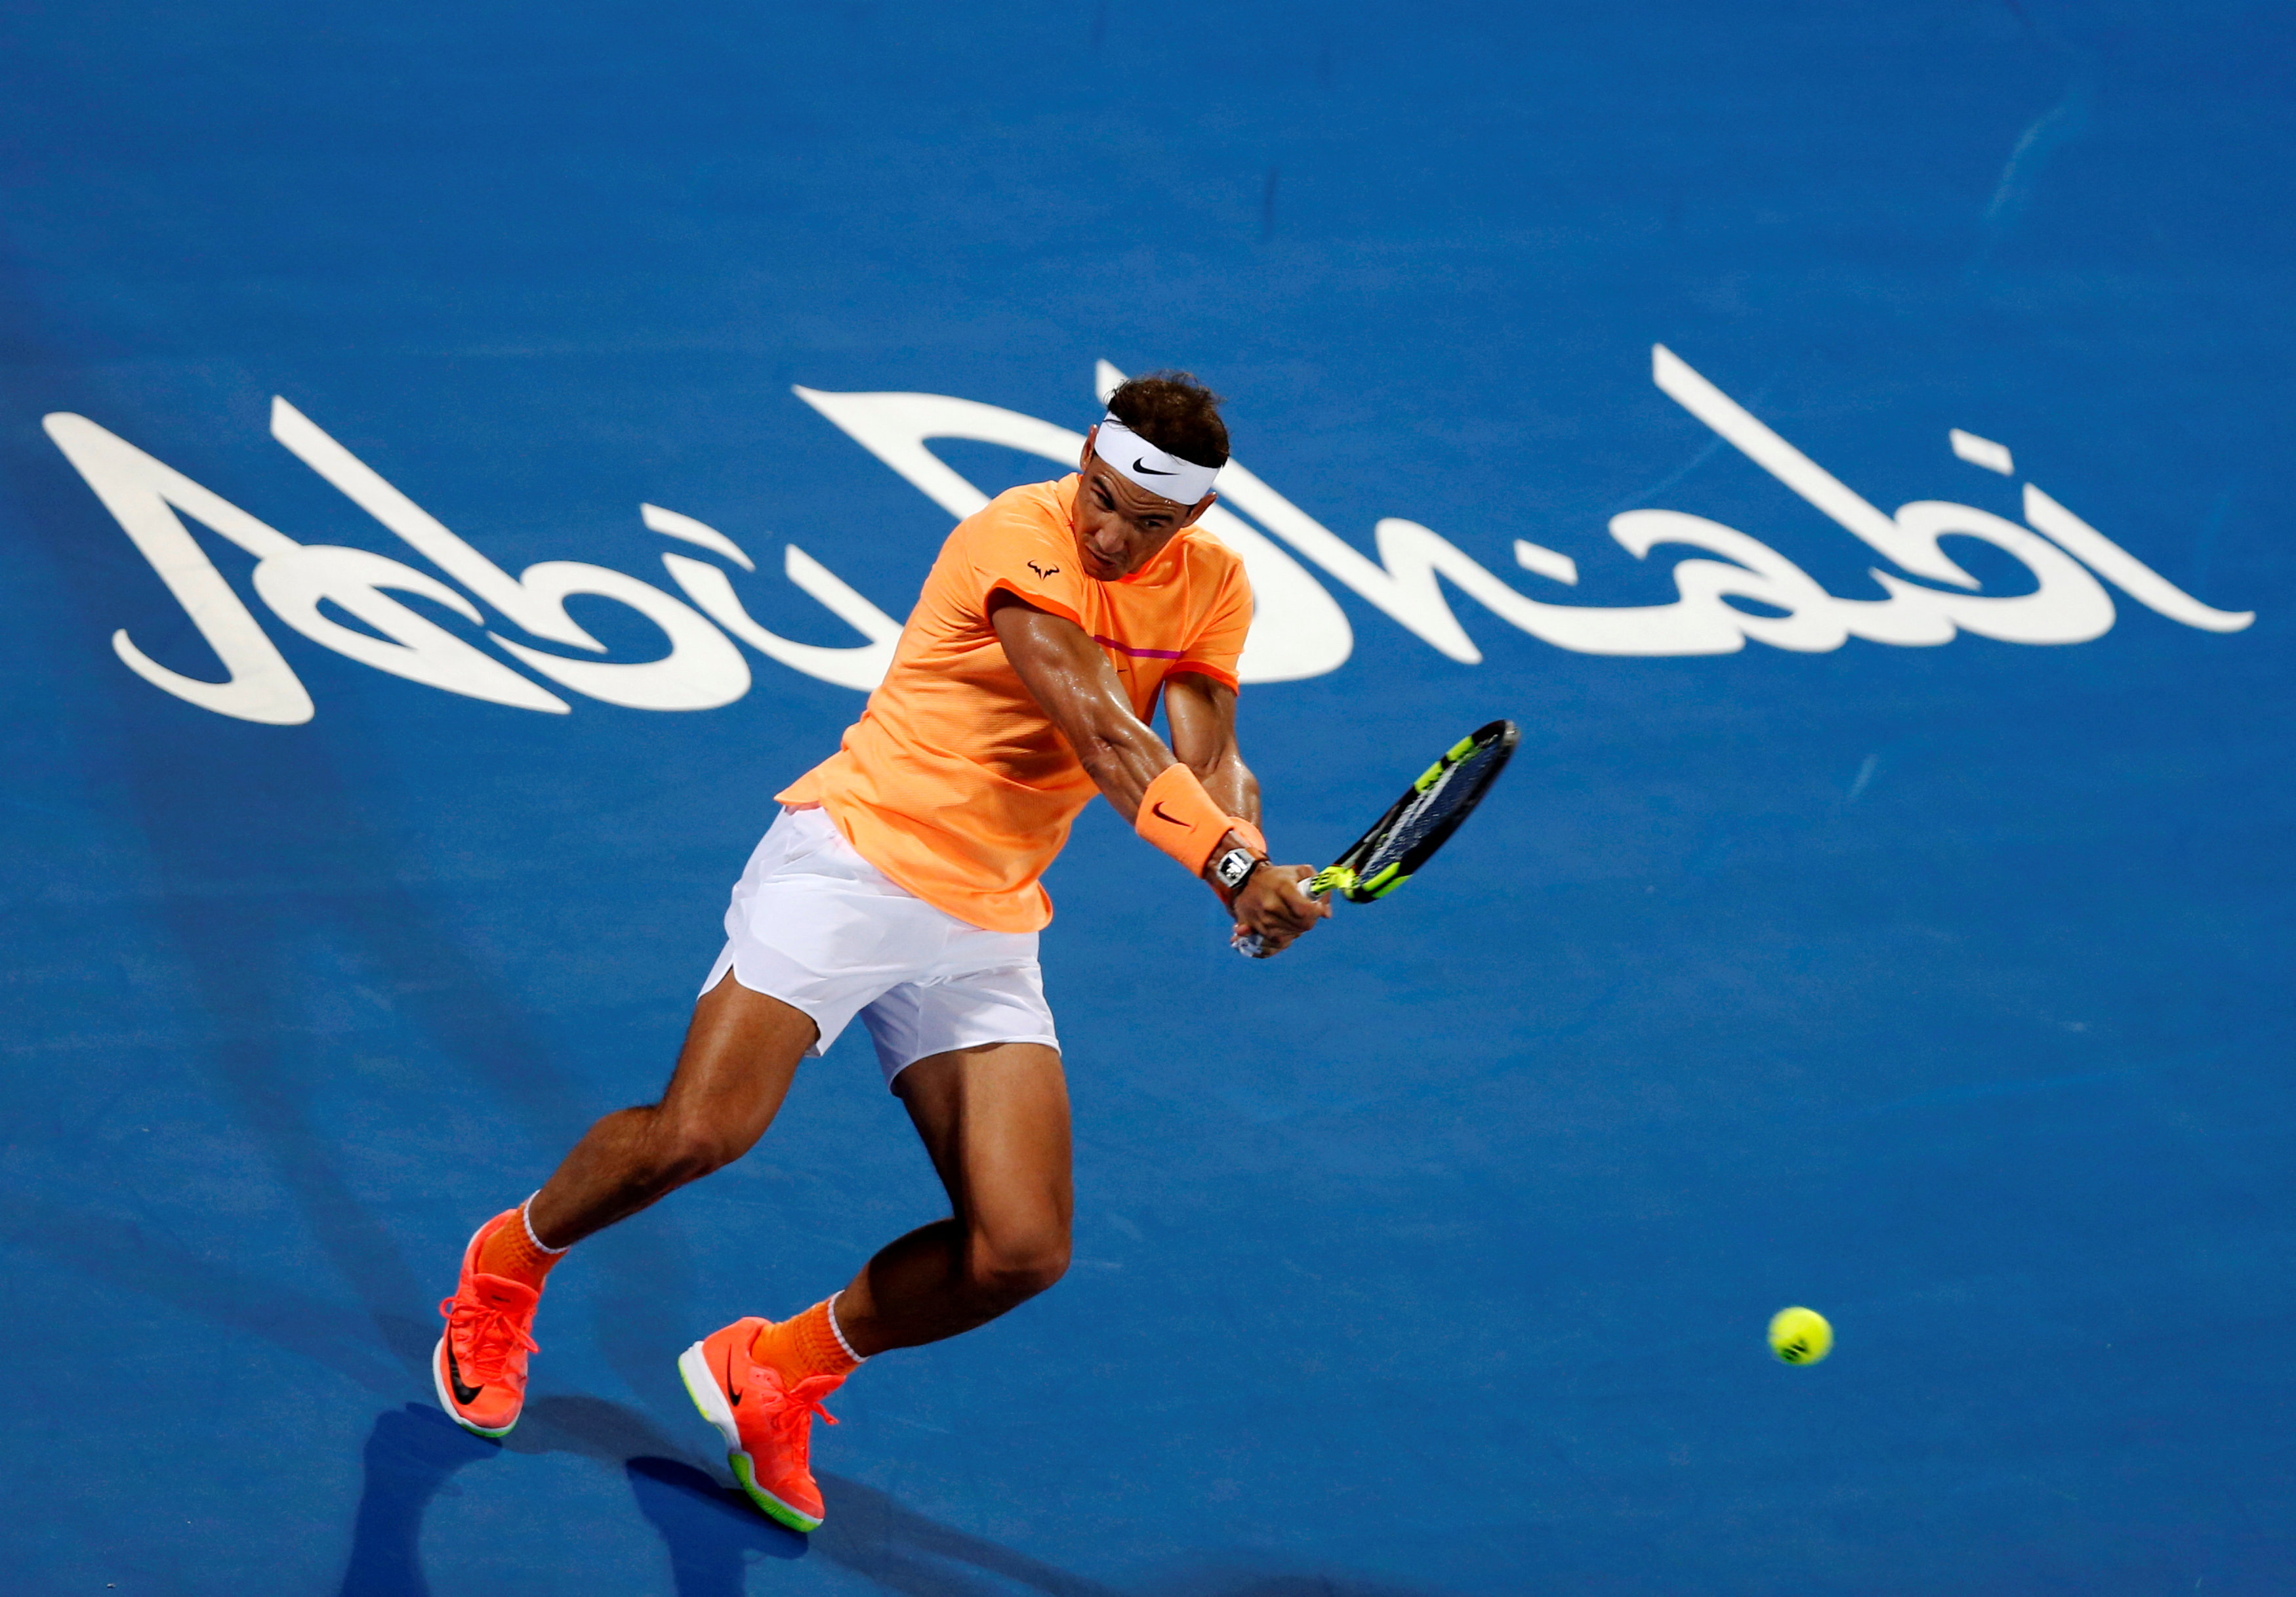

Picture source: https://www.google.com/url?sa=i&url=http%3A%2F%2Frafanadal-kingoftennis.ru%2F&psig=AOvVaw2XqMiZRSUjNGYTYxBcAYTB&ust=1636603246389000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCLCO7Jr6jPQCFQAAAAAdAAAAABAE


## Introduction

### Background   (need change)

Although the game of tennis we are familiar with today is a more recent invention, it’s ancestors date back to France in the 12th century! At this time, the game was known as jeu de paume (“game of the palm”) because it was played with the palms of the hands as opposed to racquets. In the last 200 years, the sport has not only become significantly more complex, but it’s popularity has spread rapidly and it is now played around the world! Our chosen dataset (Player stats for top 500 players) contains information on five-hundred professional men’s tennis players, including their age, name, height, best and current rankings, which hand they play with, a total of the prize money they’ve won, the number of seasons they’ve played as a professional and current elo rank of players. We plan to find a relationship between a player’s current elo rank and one of the other variables to predict the elo rank a player will have in a current or upcoming season. . To do this we will use a linear regression model. After visualizing the relationship between current elo rank and several of the other variables, we believe an individual’s best rank as a professional tennis player will serve as the best predictor for their ranking in the league. After predicting the elo rank of a new athlete, we will visualize our results in a table.

We expect to find that the current elo rank of a player increases in number (rank is increasing) as their best rank increases. This relationship could be used to predict how well a certain player would perform in an upcoming season, and could influence which player fans decide to place bets on, etc. This analysis could lead to further questions like; “What factors could cause an athlete's elo rank to fall over time?” or “By how much can we expect a player's elo rank to increase in one year?”.


## Methods and Results
### Outline

First, we transform and tidy the dataset about the rank of tennis players. Then, we find what factors can be used to predict the current elo rank most. To do this work, we use KNN regrassion and find the lowest error one become our choice. Finally we use our model to predict a new player's current elo rank.

### Exploring the data
**Reading data directly from a URL:**

In [3]:
url <- "https://drive.google.com/u/0/uc?id=11WdcdeToh-NB1eEjKE4Qr-QyaAygzj36&export=download"

player_stats_data <- read_csv(url)

colnames(player_stats_data) <- c("X1","age", "country", "plays", "wikipedia","current_rank","best_rank","name",
                   "backhand","prize_money","height","favorite_surface","turned_pro","seasons","active",
                  "current_elo_rank","best_elo_rank","peak_elo_rating", "last_appearance", "titles","GOAT_rank",
                   "best_season","retired", "masters","birthplace","residence","weight","coach","facebook","twitter",
                   "nicknames", "grand_slams","davis_cups","web_site","team_cups","olympics","weeks_at_No.1","tour_finals")
player_stats_data

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  `Turned Pro` = col_double(),
  Seasons = col_double(),
  Titles = col_double(),
  `Best Season` = col_double(),
  Retired = col_double(),
  Masters = col_double(),
  `Grand Slams` = col_double(),
  `Davis Cups` = col_double(),
  `Team Cups` = col_double(),
  Olympics = col_double(),
  `Weeks at No. 1` = col_double(),
  `Tour Finals` = col_double()
)

See spec(...) for full column specifications.



X1,age,country,plays,wikipedia,current_rank,best_rank,name,backhand,prize_money,⋯,facebook,twitter,nicknames,grand_slams,davis_cups,web_site,team_cups,olympics,weeks_at_No.1,tour_finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
495,20 (13-04-1999),France,Right-handed,Wikipedia,382 (95),380 (11-11-2019),Dan Added,Two-handed,"$57,943",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
496,26 (03-09-1993),Austria,Right-handed,Wikipedia,5 (5890),4 (06-11-2017),Dominic Thiem,One-handed,"$22,132,368 15th all-time leader in earnings",⋯,1.Dominic.Thiem,@ThiemDomi,Dominator,NA,NA,dominicthiem.tennis,NA,NA,NA,NA
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


*Table 1: initial data table*

**The predictors include:**



Variable | Explanation
--- | --- 
 age| Age of players
current_rank| Current rank of players
best_rank| Best rank of players
name|  The name of players
prize_money| Prize money 
height| Height of players
seasons| Seasons
current_elo_rank| Current elo rank of players

*Table 2: Expanation of variables*

**Cleaning and wrangling data. delet columns that we don't use. Clean the cells and make each cell have only one value. And simplifing all cells.**

In [4]:
# Cleaning and Wrangling:

stats_separate <- player_stats_data %>%
                separate(col = current_rank, into = c("current_rank", "number_of_points"), sep = " ") %>%
                separate(col = best_rank, into = c("best_rank", "date_of_best_rank"), sep = " ") %>%
                separate(col = age, into = c("age", "date_of_birth"), sep = " ")  %>%
                separate(col = current_elo_rank, into = c("current_elo_rank", "number_of_elo_points"), sep = " ")

stats_mutate <- stats_separate %>%
               mutate(age = as.double(age), best_rank = as.double(best_rank), 
                      current_rank = as.double(current_rank))

stats_mutate$prize_money = gsub("[^0-9]", "",stats_mutate$prize_money) 

stats_mutate$height = gsub("[^0-9]", "",stats_mutate$height) 

stats_select <- stats_mutate %>% 
            mutate(prize_money = as.double(prize_money),height = as.double(height), 
                   current_elo_rank = as.double(current_elo_rank) ) %>%
            select(age, current_rank, best_rank, name, prize_money, seasons, height, current_elo_rank)

stats_clean <- na.omit(stats_select) 


# stats_clean
head(stats_clean)
tail(stats_clean)

age,current_rank,best_rank,name,prize_money,seasons,height,current_elo_rank
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
32,178,44,Lukas Lacko,3261567,14,185,144
27,183,17,Bernard Tomic,6091971,11,193,100
31,121,3,Juan Martin Del Potro,2588958611,14,198,4
33,130,19,Marcel Granollers,10821168,14,190,121
32,45,11,Sam Querrey,11912152,15,198,31
32,12,9,Fabio Fognini,13470614,16,178,29


age,current_rank,best_rank,name,prize_money,seasons,height,current_elo_rank
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
30,120,39,Peter Gojowczyk,2562473,9,185,89
34,46,19,Pablo Cuevas,8480383,16,180,81
35,61,6,Gilles Simon,1477364441,17,183,63
29,35,3,Milos Raonic,1887985524,12,196,21
34,179,8,Marcos Baghdatis,8918917,16,183,74
26,5,4,Dominic Thiem,2213236815,10,185,6


*Table 3: The head and tail of the table after being simplified*

In [5]:
# Splitting data into training and testing sets:

set.seed(5)
stats_split <- initial_split(stats_clean, prop = 0.75, strata = current_rank)
stats_train <- training(stats_split)
stats_test <- testing(stats_split)

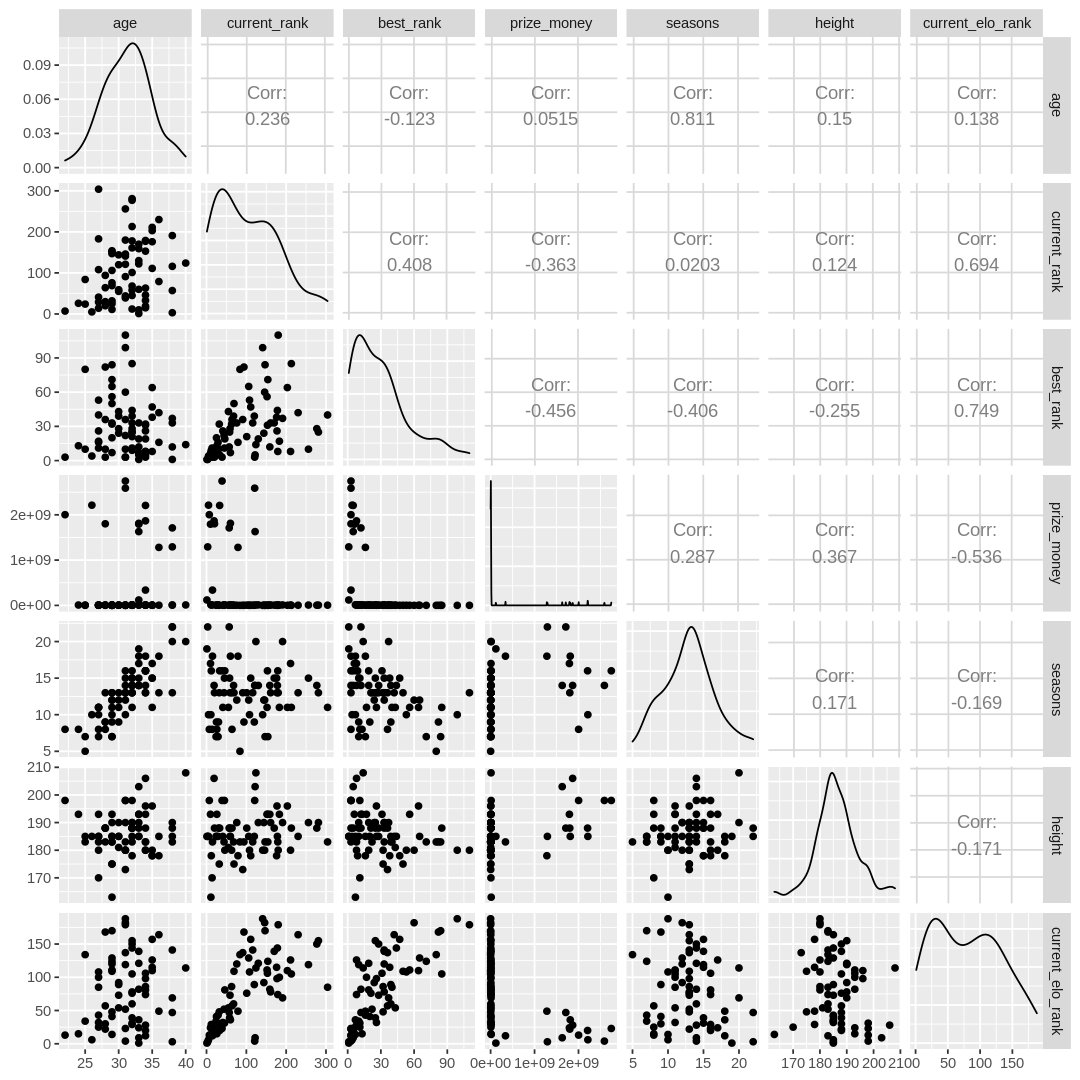

In [6]:
# selecting all quantitative predictors and visualize with ggpairs():

options(repr.plot.width = 9, repr.plot.height = 9)
stats_ggpairs <- stats_train %>%
select(-name) %>%
ggpairs()

stats_ggpairs

*Figure 1: Plot all predictor relationships using ggpair*

we can know what factors influence the current elo rank through this figure

### Model Selection

**We use two single predictor and their combine predictor to build models. And executing cross-validation in R to choose the number of neighbors. Then we evaluate KNN regression prediction accuracy in R using a test data set and the RMSPE.**

In [8]:
set.seed(5)

# Single Predictor: best_rank

elo_recipe_1 <-recipe(current_elo_rank ~best_rank, data =stats_train)%>%  
step_scale(all_predictors()) %>%  
step_center(all_predictors())

elo_spec_1 <-nearest_neighbor(weight_func ="rectangular",neighbors =tune()) %>%  
set_engine("kknn") %>%  
set_mode("regression")

elo_vfold_1 <-vfold_cv(stats_train, v =5, strata =current_elo_rank)
gridvals_1 <-tibble(neighbors = seq(1,40))

elo_wkflw_1 <-workflow() %>%  
add_recipe(elo_recipe_1) %>%  
add_model(elo_spec_1) %>%
tune_grid(resamples =elo_vfold_1, grid =gridvals_1) %>%  
collect_metrics() %>%   
filter(.metric =="rmse")

# show only the row of minimum RMSPE
elo_min_1 <-elo_wkflw_1 %>%  
filter(mean ==min(mean))
elo_min_1

kmin1 <-elo_min_1 %>% 
pull(neighbors)
              
elo_spec_1 <-nearest_neighbor(weight_func ="rectangular", neighbors =kmin1) %>%     
set_engine("kknn") %>%   
set_mode("regression")

elo_fit1 <-workflow() %>%   
add_recipe(elo_recipe_1)%>%   
add_model(elo_spec_1)%>%    
fit(data =stats_train)

elo_summary1 <-elo_fit1 %>%    
predict(stats_test) %>%   
bind_cols(stats_test) %>%   
metrics(truth =current_elo_rank, estimate =.pred) %>%   
filter(.metric =='rmse')
elo_summary1    

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,rmse,standard,33.21298,5,3.915999,Model10


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,26.17137


*Table 4: Using best rank as the predictor to find K and RMSPE*

In [9]:
set.seed(5)

# Single Predictor: prize_money

elo_recipe_2 <-recipe(current_elo_rank ~prize_money, data =stats_train)%>%  
step_scale(all_predictors()) %>%  
step_center(all_predictors())

elo_spec_2 <-nearest_neighbor(weight_func ="rectangular",neighbors =tune()) %>%  
set_engine("kknn") %>%  
set_mode("regression")

elo_vfold_2 <-vfold_cv(stats_train, v =5, strata =current_elo_rank)
gridvals_2 <-tibble(neighbors = seq(1,40))

elo_wkflw_2 <-workflow() %>%  
add_recipe(elo_recipe_2) %>%  
add_model(elo_spec_2) %>%
tune_grid(resamples =elo_vfold_2, grid =gridvals_2) %>%  
collect_metrics() %>%   
filter(.metric =="rmse")

# show only the row of minimum RMSPE
elo_min_2 <-elo_wkflw_2 %>%  
filter(mean ==min(mean))
elo_min_2

kmin2 <-elo_min_2 %>% 
pull(neighbors)
              
elo_spec_2 <-nearest_neighbor(weight_func ="rectangular", neighbors =kmin2) %>%     
set_engine("kknn") %>%   
set_mode("regression")

elo_fit2 <-workflow() %>%   
add_recipe(elo_recipe_2)%>%   
add_model(elo_spec_2)%>%    
fit(data =stats_train)

elo_summary2 <-elo_fit2 %>%    
predict(stats_test) %>%   
bind_cols(stats_test) %>%   
metrics(truth =current_elo_rank, estimate =.pred) %>%   
filter(.metric =='rmse')
elo_summary2    

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
8,rmse,standard,34.18447,5,3.721169,Model08


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,33.58742


*Table 5: Using prize money as the predictor to find K and RMSPE*

In [13]:
set.seed(5)

# Multi Predictor: best_rank + prize_money

elo_recipe <-recipe(current_elo_rank ~best_rank + prize_money, data = stats_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())


elo_spec<-nearest_neighbor(weight_func="rectangular", neighbors=tune()) %>%
set_engine("kknn") %>%
set_mode("regression")

sacr_vfold <- vfold_cv(stats_train, v = 5, strata = current_elo_rank)
gridvals <- tibble(neighbors = seq(1,40))

elo_wkflw<-workflow() %>%
add_recipe(elo_recipe) %>%
add_model(elo_spec)  %>%
tune_grid(sacr_vfold, grid =gridvals) %>% 
collect_metrics() %>%
filter(.metric =="rmse") 


elo_min <- elo_wkflw %>%
filter(mean==min(mean))

elo_min

elo_k<- elo_min %>%
pull(neighbors)


elo_spec<-nearest_neighbor(weight_func="rectangular", neighbors=elo_k) %>%
set_engine("kknn") %>%
set_mode("regression")

knn_mult_fit<- workflow() %>%
add_recipe(elo_recipe) %>%
add_model(elo_spec) %>%
fit(data =stats_train)   

knn_mult_preds<- knn_mult_fit %>%
predict(stats_test) %>%
bind_cols(stats_test)

knn_mult_mets1<-metrics(knn_mult_preds,truth= current_elo_rank, estimate = .pred) %>%
  filter(.metric == "rmse")

knn_mult_mets1





Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rmse,standard,34.61139,5,3.297646,Model07


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,30.65035


*Table 6: Using prize money and best rank as predictors to find K and RMSPE*

In [14]:
# put these three estimate together
final_result_1 <- elo_summary1 %>%
mutate(predictor = "current_elo_rank ~best_rank")  %>%
select( predictor, .estimate) 


final_result_2 <- elo_summary2 %>%
mutate(predictor = "current_elo_rank ~prize_money")  %>%
select( predictor, .estimate) 


final_result_3 <- knn_mult_mets1 %>%
mutate(predictor = "current_elo_rank ~best_rank + prize_money")  %>%
select( predictor, .estimate) 



final_result <- rbind(final_result_1, final_result_2,final_result_3)
final_result

predictor,.estimate
<chr>,<dbl>
current_elo_rank ~best_rank,26.17137
current_elo_rank ~prize_money,33.58742
current_elo_rank ~best_rank + prize_money,30.65035


*Table 7: Predictor Models with RMSPE*

predictor,.estimate,k
<chr>,<dbl>,<chr>
current_elo_rank ~best_rank,26.17137,10


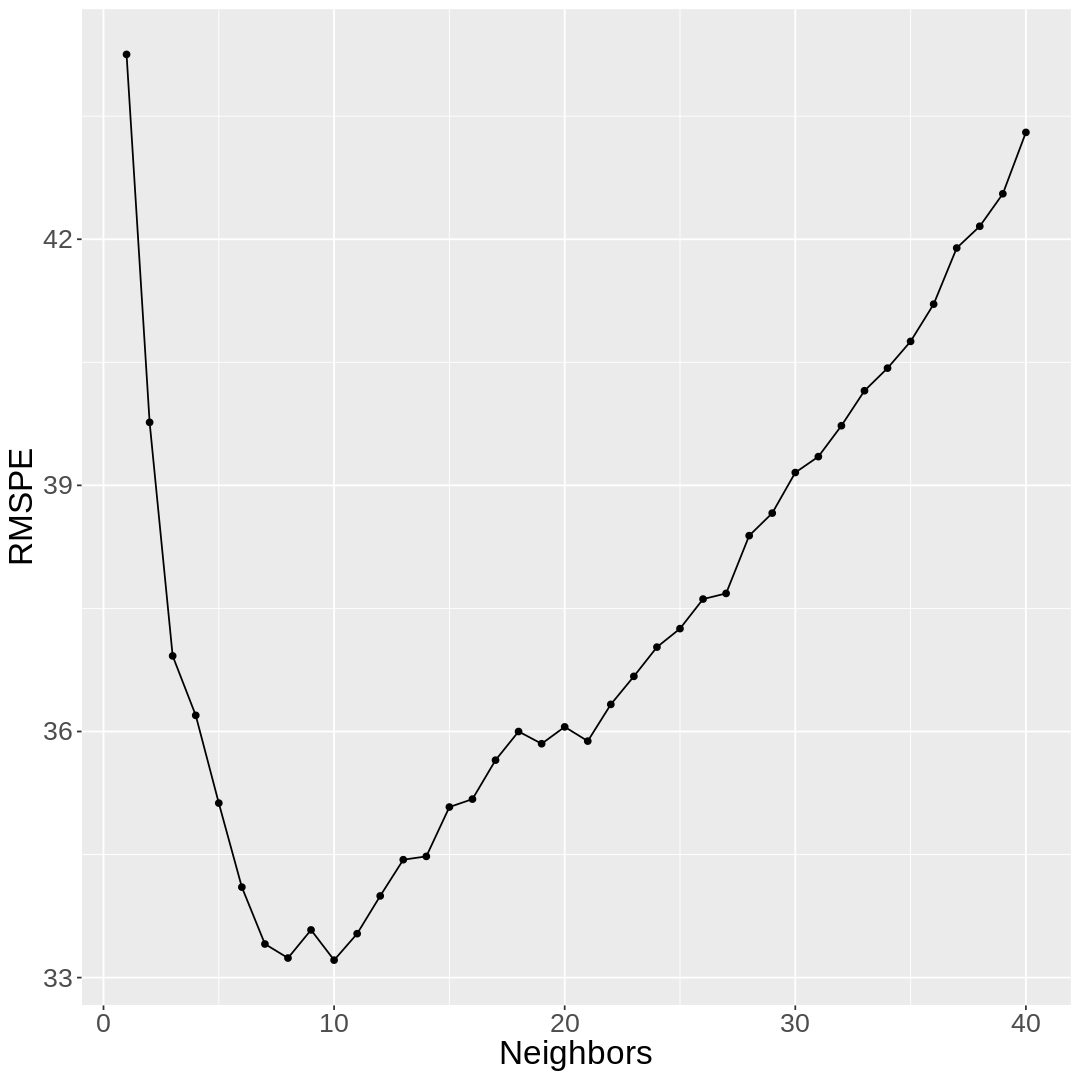

In [15]:
 # The figure about how to find the best k and RMSPE
best_pred <- final_result_1  %>%
mutate(k = "10")
best_pred

best_plot <- ggplot(elo_wkflw_1,aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Neighbors", y = "RMSPE") + 
        theme(text = element_text(size = 20))
best_plot

*Table 8: Best RMSPE* 

*Figure 2: K vs RMSPE for best rank and prize money*

### Using the Model to predict a virtual player

In [16]:
# best model we will use to predict current elo rank
set.seed(6)

elo_recipe_final <-recipe(current_elo_rank ~best_rank, data = stats_train) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())


elo_spec_final<-nearest_neighbor(weight_func="rectangular", neighbors=10) %>%
set_engine("kknn") %>%
set_mode("regression")

elo_fit_final <-workflow() %>%   
add_recipe(elo_recipe_final)%>%   
add_model(elo_spec_final)%>%    
fit(data =stats_train)


In [17]:
# create a virtual player  with corresponding player statistics
virtual_player <- tibble(name = c("player"), 
                      best_rank = c(31), 
                      prize_money = c(4023875))

prediction <- predict(elo_fit_final, virtual_player) 
final_table <- bind_cols(virtual_player, prediction) %>%
    rename(predicted_current_elo_rank = .pred)

final_table

name,best_rank,prize_money,predicted_current_elo_rank
<chr>,<dbl>,<dbl>,<dbl>
player,31,4023875,97.3


*Table 9: Virtual player analysis* 

**Since current elo rank must be an integer, so we get the result: 97.**

## Discussion




In general, we found that players' best rank can well predict players' Current elo rank.Using this variable, we trained a KNN regression model with an rmspe of only 26.17137. Compared with the  model using the other predictors, the rmspe is lower. We tested our model on a newly created player who has different best rankings. We found that the predicted winning rate reflects the corresponding statistics.

## Refenrences

The history of tennis. (n.d.). Retrieved May 24, 2022, from https://www.tennistheme.com/tennishistory.html 
Data source: 